In [1]:
#SANIKA KULKARNI 
#OASIS INFOBYTE DATA SCIENCE INTERNSHIP TASK 4
#EMAIL SPAM DETECTION

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the Dependencies**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
# Loading the dataset
df2 = pd.read_csv('/content/drive/MyDrive/spam - spam.csv')

In [25]:
df=df2.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4']) #Dropping unnecessary columns 
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [27]:
df.head

<bound method NDFrame.head of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [28]:
df.tail

<bound method NDFrame.tail of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [29]:
df.shape #Finding number of rows and columns 

(5572, 2)

In [30]:
df.dtypes

v1    object
v2    object
dtype: object

In [31]:
df.isnull().sum() #Counting number of null values 

v1    0
v2    0
dtype: int64

Text(0, 0.5, 'Count')

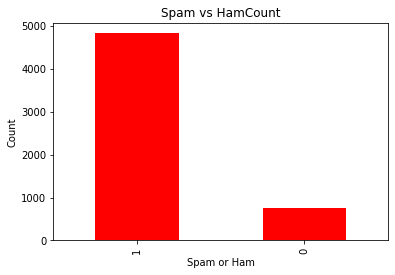

In [84]:
df['v1'].value_counts().plot(kind='bar',color="red")
plt.title("Spam vs HamCount")
plt.xlabel('Spam or Ham')
plt.ylabel('Count')

In [32]:
# Replacing the Null values with a Null string
#df1= df.where((pd.notnull(df)),'')

In [37]:
a=df.duplicated().sum() #Checking for duplicate values
print("Number of duplicate values are :",a) 

Number of duplicate values are : 409


Performing Label Encoding

In [46]:
# Labelling spam mail as 0 and ham mail as 1

df.loc[df['v1'] == 'spam', 'v1',] = 0
df.loc[df['v1'] == 'ham', 'v1',] = 1
df

,v1,v2,Category
0,1,"Go until jurong point, crazy.. Available only ...",NaN
1,1,Ok lar... Joking wif u oni...,NaN
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,1,U dun say so early hor... U c already then say...,NaN
4,1,"Nah I don't think he goes to usf, he lives aro...",NaN
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,NaN
5568,1,Will Ì_ b going to esplanade fr home?,NaN
5569,1,"Pity, * was in mood for that. So...any other s...",NaN
5570,1,The guy did some bitching but I acted like i'd...,NaN


In [53]:
df1=df.drop(columns=['Category'])
df1

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [54]:
df1.rename(columns={"v1": "Category","v2": "Message"}, inplace=True)
df1


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [55]:
# Separating the data as texts and label

X = df1['Message']

Y = df1['Category']

In [56]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [57]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


**Splitting the data into training data & test data using train test split**

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [59]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


**Performing Feature Extraction**

In [64]:
# Transforming  the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [65]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [66]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

Training the Model

Logistic Regression

In [67]:
model = LogisticRegression()

In [68]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [74]:
# Prediction on training data

predict_train= model.predict(X_train_features)
accuracy_train = accuracy_score(Y_train,predict_train)

In [75]:
print('Accuracy of training data : ', accuracy_train)

Accuracy of training data :  0.9661207089970832


In [77]:
# Prediction of test data

predict_test = model.predict(X_test_features)
accuracy_test = accuracy_score(Y_test, predict_test)

In [78]:
print('Accuracy of test data : ', accuracy_test)

Accuracy of test data :  0.9623318385650225


**Model Building and Prediction**

In [83]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim.."]

# Converting text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# Prediction

predict = model.predict(input_data_features)
print(predict)

#Specifying conditions
if (predict[0]==1):
  print(' Input mail is a Ham mail')

else:
  print(' Input mail is a Spam mail !! Report as early as possible.')

[0]
 Input mail is a Spam mail !! Report as early as possible.
